<a href="https://colab.research.google.com/github/Paulina9555/Repo1/blob/master/wizualizacje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zajęcia

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters

In [ ]:
register_matplotlib_converters() #Używanie jednostek pandas w matplotlib

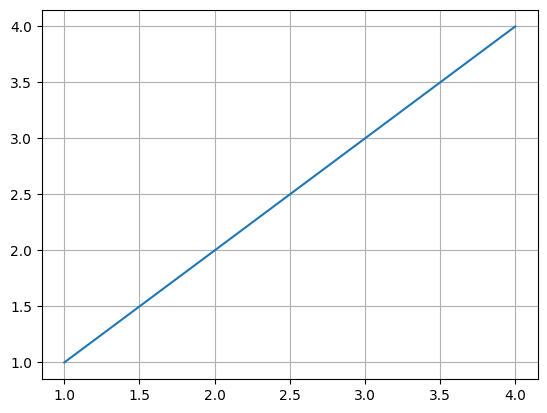

In [ ]:
fig, ax = plt.subplots() #Utworzenie rysunku
ax.grid() #Tworzenie siatki
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

ax.plot(x,y)

plt.show()

In [ ]:
weather = pd.read_csv('weather.csv', parse_dates=True, index_col='date')

NameError: ignored

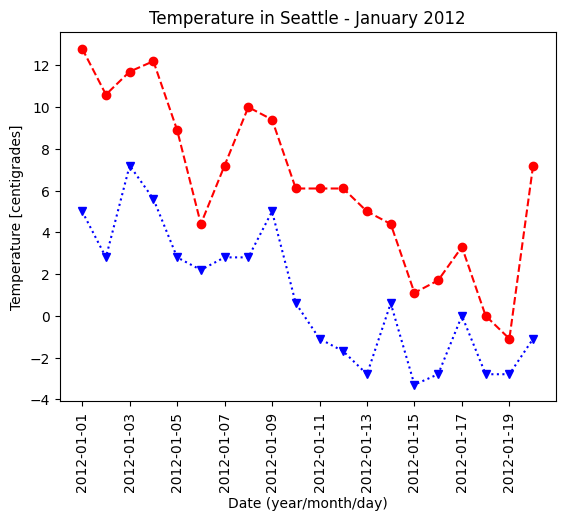

In [ ]:
n = 20
fig, ax = plt.subplots()

#Rysowanie wykresu z użyciem metody obiektu axis
#Wykorzystanie markerów dla podkreślenia dyskretnego charakteru danych
ax.plot(weather.index[:n], weather['temp_max'][:n], marker='o', linestyle="--" , color='r')
ax.plot(weather.index[:n], weather['temp_min'][:n], marker='v', linestyle='dotted', color='b')

#Etykieta osi X
ax.set_xlabel('Date (year/month/day)')
#Etykieta osi y
ax.set_ylabel('Temperature [centigrades]')
#Tytuł wykresu
ax.set_title('Temperature in Seattle - January 2012')
#Obrtót etykiet na osi X
ax.xaxis.set_tick_params(rotation=90)

plt.show()

In [ ]:
austin_weather = pd.read_csv('austin_weather.csv', parse_dates=True, index_col='Date')

ValueError: ignored

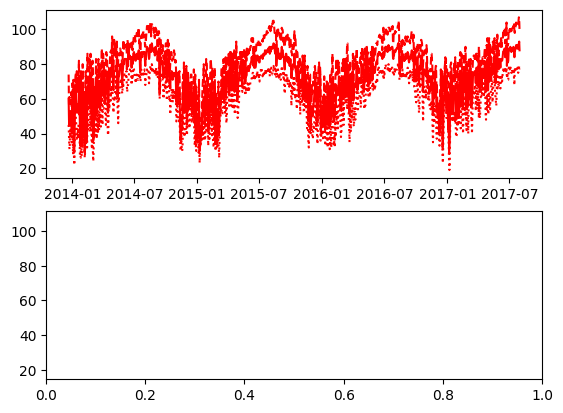

In [ ]:
fig, ax = plt.subplots(2,1, sharey=True)

ax[0].plot(austin_weather.index, austin_weather['TempAvgF'].astype(float), color='r')
ax[0].plot(austin_weather.index, austin_weather['TempHighF'].astype(float), color='r', linestyle='--')
ax[0].plot(austin_weather.index, austin_weather['TempLowF'].astype(float), color='r', linestyle='dotted')

ax[1].plot(austin_weather.index, austin_weather['DewPointAvgF'].astype(float), color='b')
ax[1].plot(austin_weather.index, austin_weather['DewPointHighF'].astype(float), color='b', linestyle='--')
ax[1].plot(austin_weather.index, austin_weather['DewPointLowF'].astype(float), color='b', linestyle='dotted')

ax[1].set_xlabel('Date (year/month/day)')

ax[0].set_ylabel('Temperature')
ax[1].set_ylabel('Dew Point')
ax[0].set_title('Weather in Austin')

ax[0].set_xticklabels([])
ax[1].xaxis.set_tick_params(rotation=90)

ax[0].annotate('Something happenned', xy=[pd.Timestamp('2014-01-06'), 28],
               xytext=(pd.Timestamp('2014-01-9'), 22.5),
               arrowprops={'arrowstyle':'->', 'color':'gray'}) #xy moment zdarzenia, xytext położenie tekstu

plt.show()

In [ ]:
co2 = pd.read_csv('co2.csv', parse_dates=True, index_col='Date')

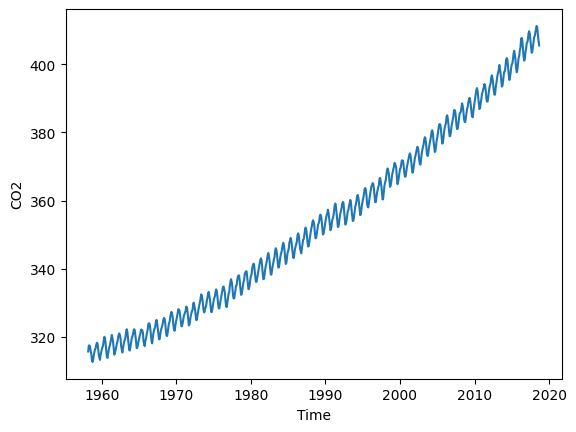

In [ ]:
fig, ax = plt.subplots()
ax.plot(co2.index, co2['Interpolated'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

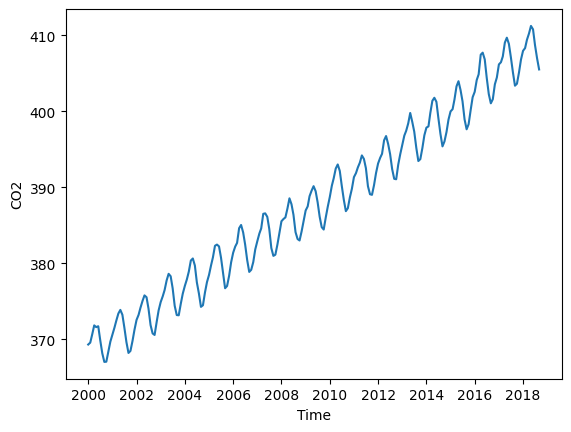

In [ ]:
millenium = co2['2000':]
fig,ax = plt.subplots()
ax.plot(millenium.index, millenium['Interpolated'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

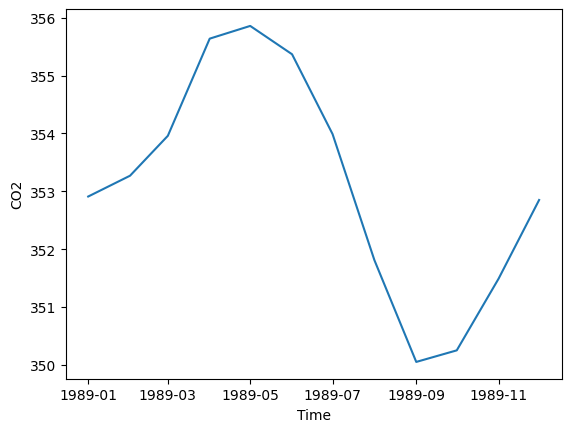

In [ ]:
eighty_nine = co2['1989':'1989']
fig,ax = plt.subplots()
ax.plot(eighty_nine.index, eighty_nine['Interpolated'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

In [ ]:
temperature=pd.read_csv('temperature.csv', parse_dates=True, index_col='dt')
temperature.index.names = ['Date']
merged=pd.merge(co2, bangkok, how='inner', on='Date')

fig,ax=plt.subplots()
ax.plot(merged.index, merged['Interpolated'], color='b')
ax.plot(merged.index, merged['AverageTemperature'])

ax.set_xlabel('Time')
ax.set_ylabel('CO2',color='b')
ax.tick_params('y', colors='b')

ax2=ax.twinx()
ax2.plot(merged.index, merged['AverageTemperature'], color='r')
ax2.set_ylabel('Temperature', color='r')
ax2.tick_params('y', colors='r')

plt.show()

FileNotFoundError: ignored

In [ ]:
population = pd.read_csv('population.csv', index_col='City')

In [ ]:
groupby = population.groupby('Sex')
both, female, male = [groupby.get_group(x) for x in groupby.groups]

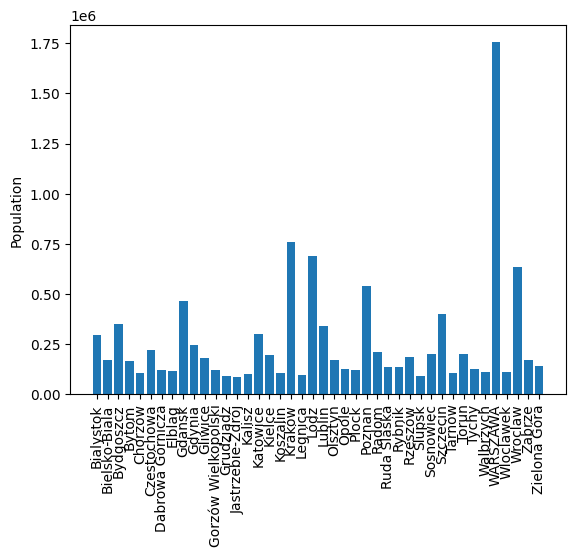

In [ ]:
fig, ax = plt.subplots()
ax.bar(both.index, both['Value'])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Population')
plt.show()

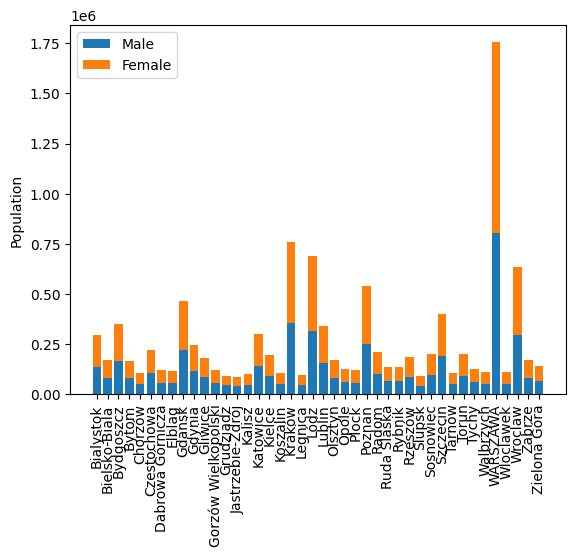

In [ ]:
fig, ax = plt.subplots()
ax.bar(male.index, male['Value'], label='Male')
ax.bar(female.index, female['Value'], bottom=male['Value'], label='Female')
ax.tick_params('x', labelrotation=90)
ax.set_ylabel('Population')

ax.legend()

plt.show()

In [ ]:
austin_weather = pd.read_csv('austin_weather(1).csv', index_col='Date')

TypeError: ignored

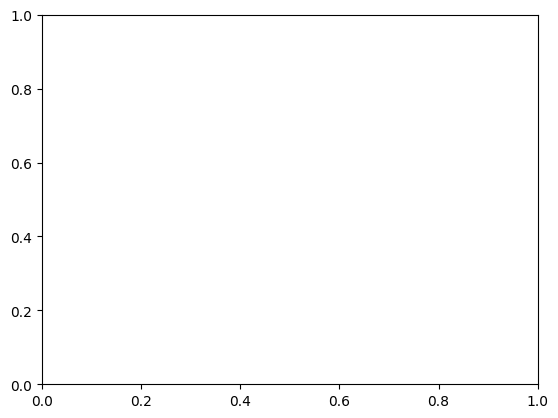

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(austin_weather.index, austin_weather=['TempAvgF'],
            yerr=(austin_weather['TempHighF']-austin_weather['TempLowF'])/4)

ax.set_ylabel('Temperature')
ax.set_title('Weather in Austin')
ax.xaxis.set_tick_params(rotation=90)

plt.show()

In [ ]:
import seaborn as sns
from IPython.display import display

In [ ]:
pd.plotting.register_matplotlib_converters()

In [ ]:
wine = pd.read_csv('wine.csv')

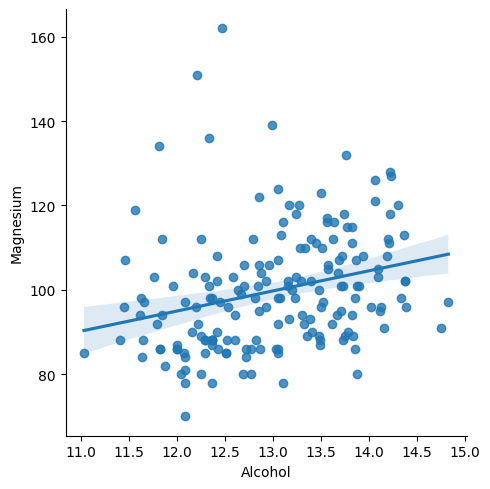

In [ ]:
sns.lmplot(x = 'Alcohol', y= 'Magnesium', data=wine)


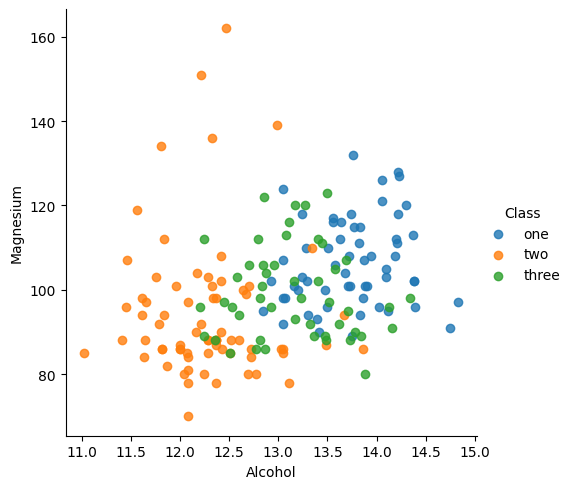

In [ ]:
sns.lmplot(x='Alcohol', y='Magnesium', data=wine, fit_reg=False, hue='Class')

(11.0, 14.0)

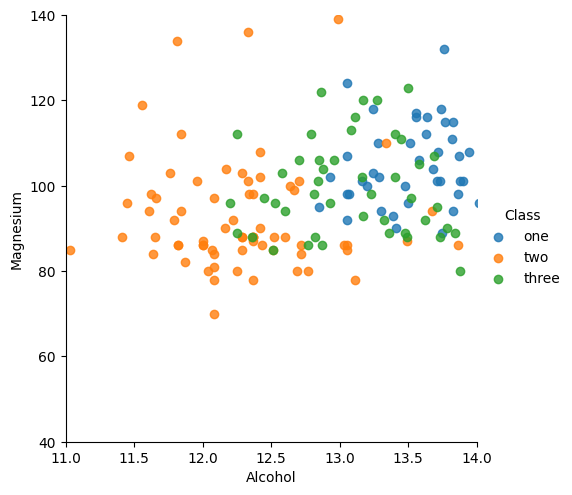

In [ ]:
sns.lmplot(x='Alcohol', y='Magnesium', data=wine, fit_reg=False, hue='Class')

plt.ylim(40, 140)
plt.xlim(11, 14)

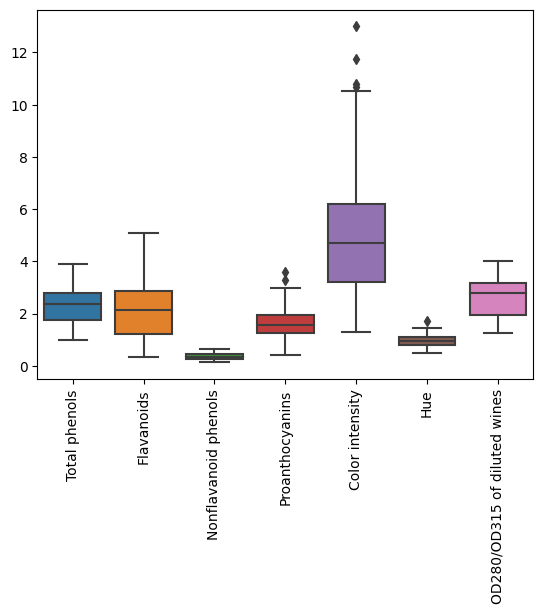

In [ ]:
g = sns.boxplot(data=wine.iloc[:,5:-2])
g.xaxis.set_tick_params(rotation=90)

<Axes: xlabel='Class', ylabel='Alcohol'>

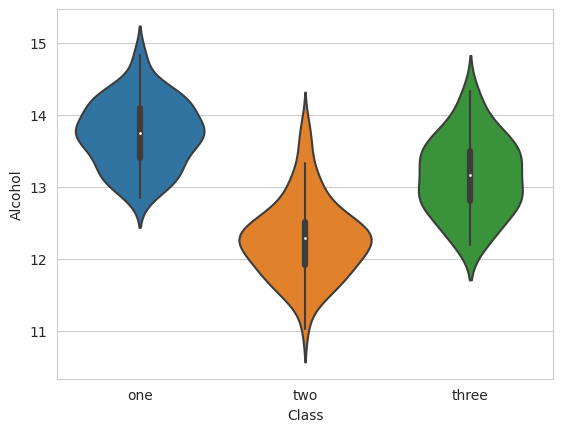

In [ ]:
sns.set_style('whitegrid')
sns.violinplot(x='Class', y='Alcohol', data=wine)

<Axes: xlabel='Class', ylabel='Alcohol'>

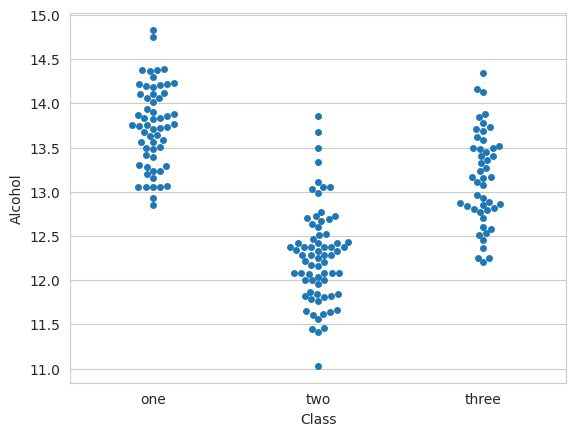

In [ ]:
sns.set_style('whitegrid')
sns.swarmplot(x='Class', y='Alcohol', data=wine)

Text(0.5, 1.0, 'Klasa alkoholu w zależności od typu wina')

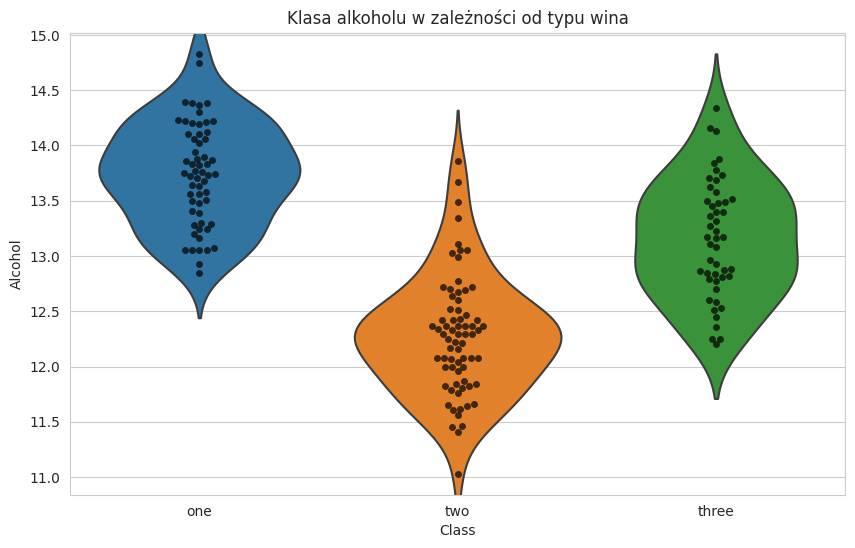

In [ ]:
plt.figure(figsize=(10,6))

sns.violinplot(x='Class',
               y='Alcohol',
               data=wine,
               inner=None)

sns.swarmplot(x='Class',
              y='Alcohol',
              data=wine,
              color='k',
              alpha=0.7)

plt.title('Klasa alkoholu w zależności od typu wina')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


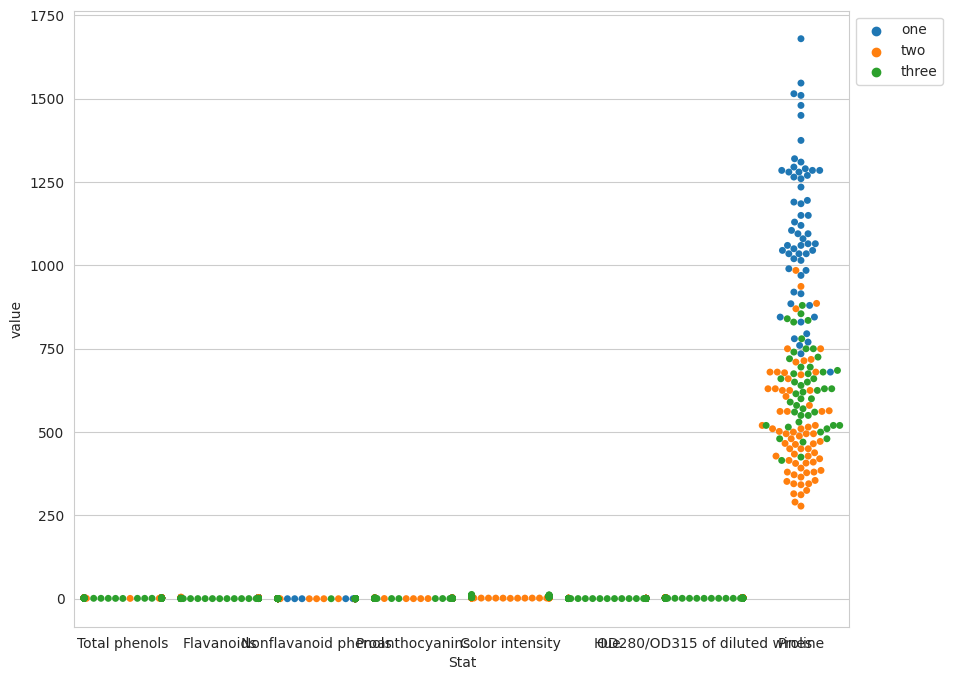

In [ ]:
melted_df=pd.melt(wine.iloc[:,5:],
                  id_vars = 'Class',
                  var_name = 'Stat')

plt.figure(figsize=(10,8))

sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Class')

plt.legend(bbox_to_anchor=(1,1), loc=2)

<ipython-input-23-3d94dd3d5c0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=wine.corr()


<Axes: >

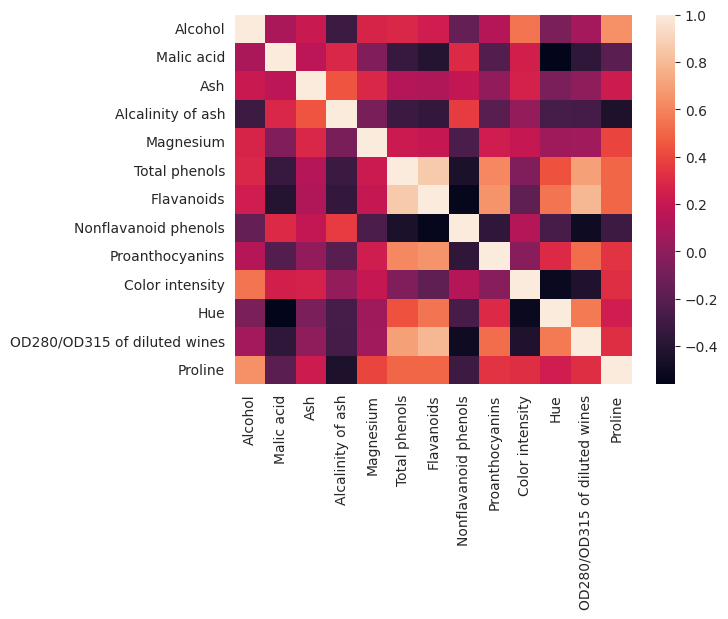

In [ ]:
corr=wine.corr()

sns.heatmap(corr)

<ipython-input-24-ce64b7286212>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine.Alcohol)


<Axes: xlabel='Alcohol', ylabel='Density'>

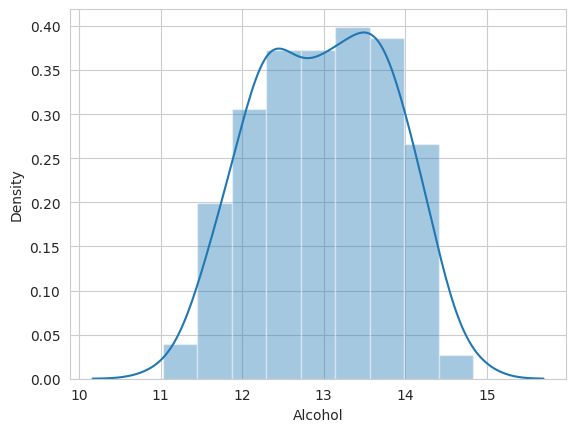

In [ ]:
sns.distplot(wine.Alcohol)

<Axes: xlabel='Class', ylabel='count'>

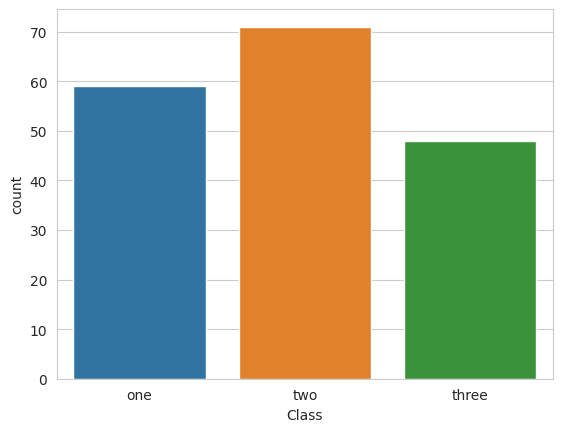

In [ ]:
sns.countplot(x='Class', data=wine)

In [ ]:
sns.kdeplot(wine.Alcohol, wine.Magnesium)

TypeError: ignored

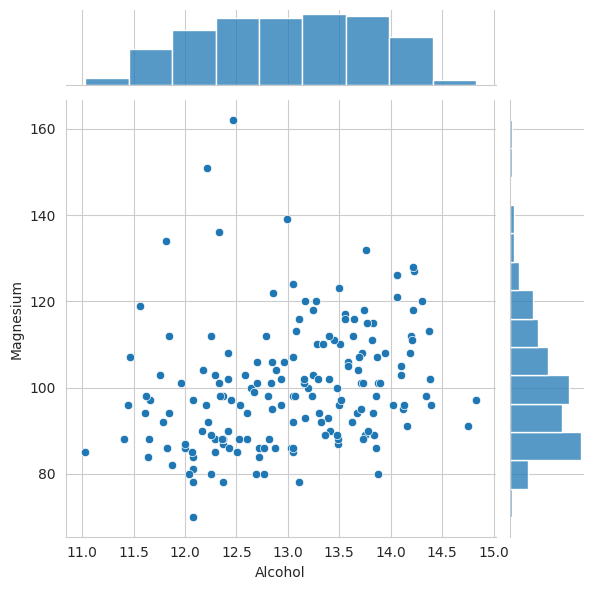

In [ ]:
sns.jointplot(x='Alcohol', y='Magnesium', data=wine)

In [ ]:
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

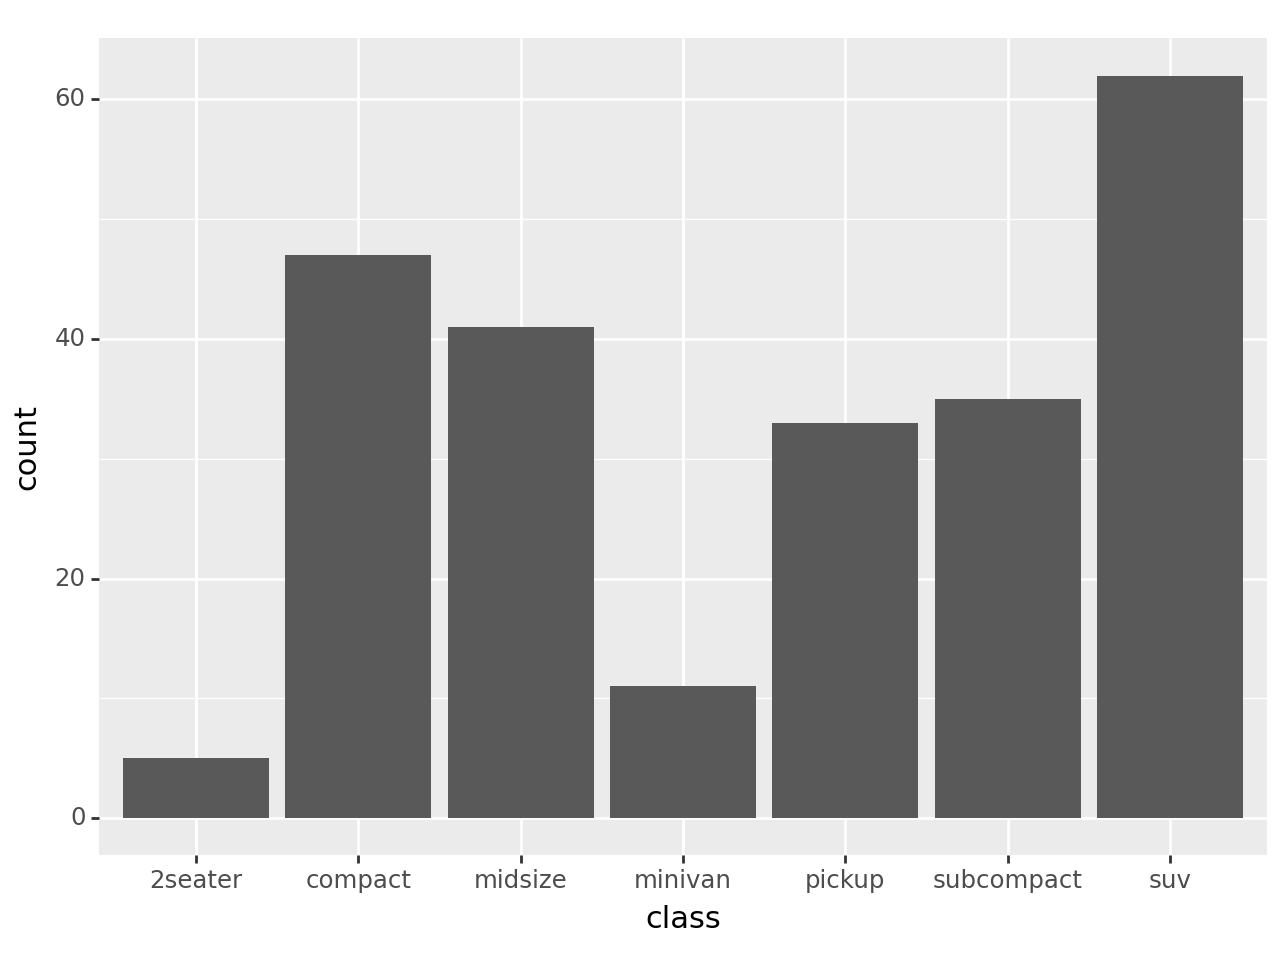

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mpg)
+ aes(x='class')
+ geom_bar(size=20)
)

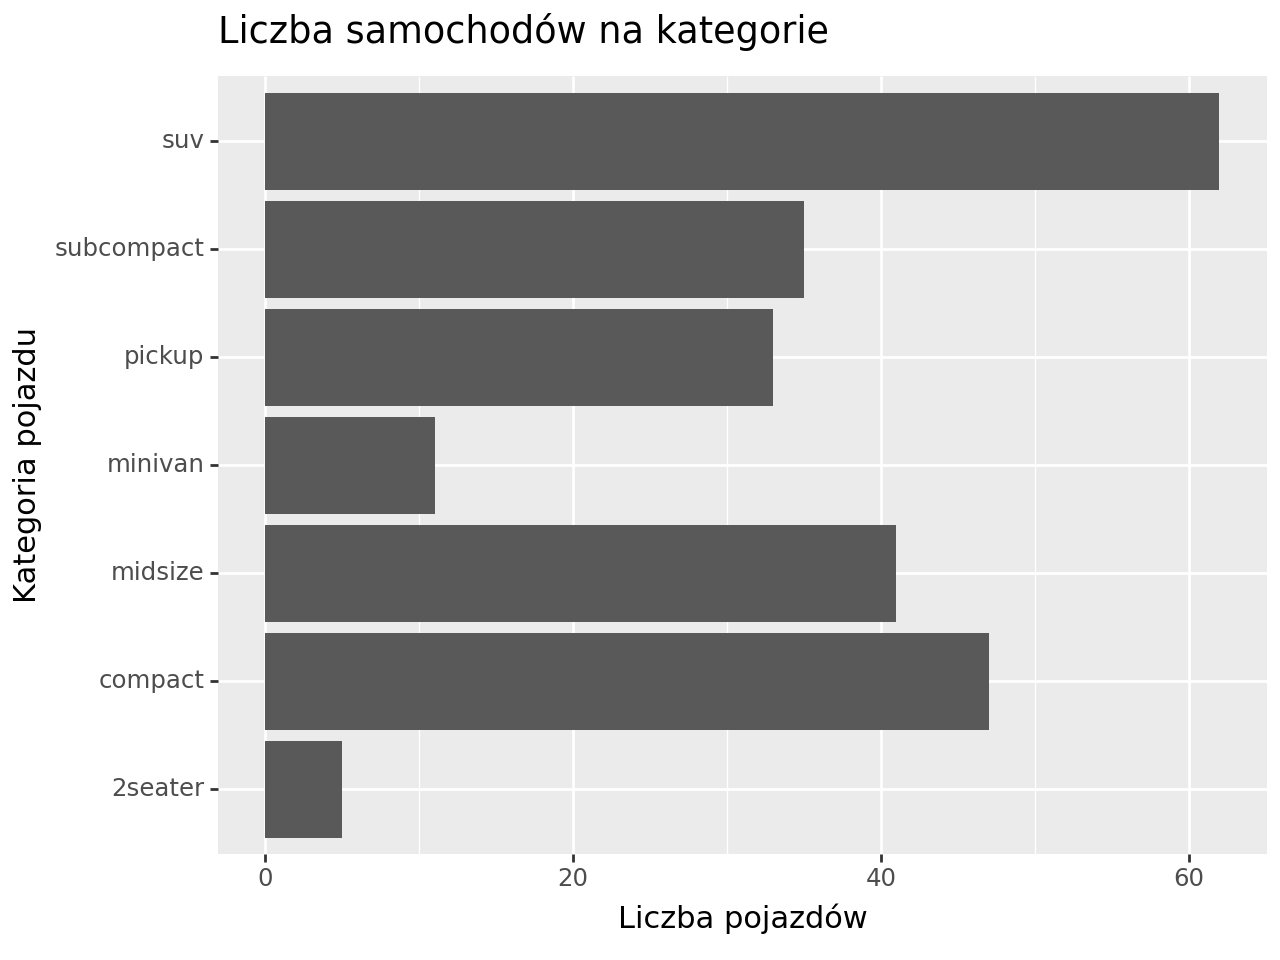

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mpg)
+ aes(x='class')
+ geom_bar(size=20)
+ coord_flip()
+ labs(title='Liczba samochodów na kategorie', x='Kategoria pojazdu', y='Liczba pojazdów')
)

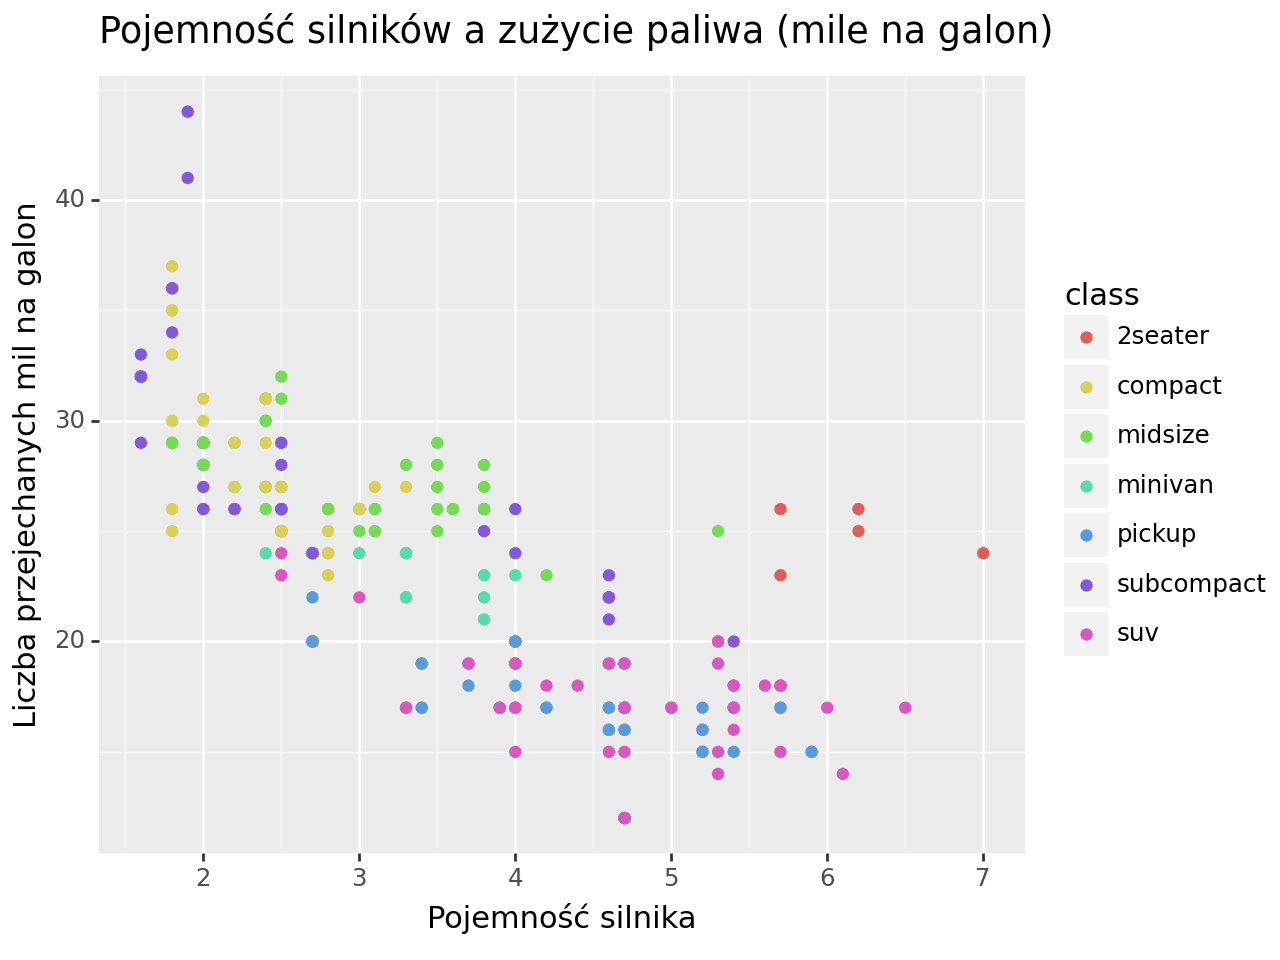

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mpg)
+ aes(x='displ', y='hwy', color='class')
+ geom_point()
+ labs(title='Pojemność silników a zużycie paliwa (mile na galon)', x='Pojemność silnika', y='Liczba przejechanych mil na galon')
)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
timesData = pd.read_csv('timesData.csv')

In [ ]:
df = timesData.iloc[:100,:]

trace1 = go.Scatter(x = df.world_rank,
                    y = df.citations,
                    mode = 'lines',
                    name = 'Cytowania',
                    marker = dict(color='rgba(16, 112, 2, 0.8)'),
                    text = df.university_name)

trace2 = go.Scatter(x = df.world_rank,
                    y = df.teaching,
                    mode = 'lines+markers',
                    name = 'Poziom nauki',
                    marker = dict(color='rgba(80, 26, 80, 0.8)'),
                    text = df.university_name)

data = [trace1, trace2]
layout = dict(title='Poziom nauczania i cytowania a pozycja w rankingu TOP 100',
              xaxis = dict(title='Ranking światowy', ticklen=5, zeroline=False),
              )

fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

trace1 = go.Scatter(x = df2014.world_rank,
                    y = df2014.citations,
                    mode = 'markers',
                    name = '2014',
                    marker = dict(color='rgba(255, 128, 255, 0.8)'),
                    text = df2014.university_name)

trace2 = go.Scatter(x = df2015.world_rank,
                    y = df2015.citations,
                    mode = 'markers',
                    name = '2015',
                    marker = dict(color='rgba(255, 128, 2, 0.8)'),
                    text = df2015.university_name)


trace3 = go.Scatter(x = df2016.world_rank,
                    y = df2016.citations,
                    mode = 'markers',
                    name = '2016',
                    marker = dict(color='rgba(255, 128, 200, 0.8)'),
                    text = df2016.university_name)

data=[trace1, trace2, trace3]
layout = dict(title='Cytowania i ranking najlepszych uniwersytetów w 2014, 2015 i 2016 roku',
              xaxis = dict(title='Ranking światowy', ticklen=5, zeroline=False),
              yaxis = dict(title='Citation', ticklen=5, zeroline=False),
              )

fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

trace1 = go.Bar(x = df2014.university_name,
                    y = df2014.citations,
                    name = 'Cytowania',
                    marker = dict(color='rgb(255, 174, 255, 0.5)',
                    line = dict(color='rgb(0,0,0)', width=1.5)),
                    text = df2014.country)

trace2 = go.Bar(x = df2014.university_name,
                    y = df2014.teaching,
                    name = 'Nauczanie',
                    marker = dict(color='rgb(255, 255, 128, 0.5)',
                    line = dict(color='rgb(0,0,0)', width=1.5)),
                    text = df2014.country)

data = [trace1, trace2]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',','.')) for each in df2016.num_students]
labels = df2016.university_name

fig = {
    'data': [
        {
            'values': pie1_list,
            'labels': labels,
            'domain': {'x': [0, .5]},
            'name': 'Liczba studentów (procentowo)',
            'hoverinfo': 'label+percent+name',
            'hole': 3,
            'type': 'pie'
        },
    ],
    'layout':{
        'title': 'Procentowa liczebność studentów na uniwersytetach',
        'annotations': [
            { 'font': { 'size': 20},
             'showarrow': False,
              'text': 'Liczba studentów',
              'x': 0.20,
              'y': 1},
        ]
    }
}

iplot(fig)

ValueError: ignored

In [ ]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_student_size = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_student_size,
            'showscale': True,
        },
        'text': df2016.university_name
    }
]

iplot(data)

In [ ]:
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x = x2011,
    opacity = 0.75,
    name = '2011',
    marker = dict(color = 'rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x = x2012,
    opacity = 0.75,
    name = '2012',
    marker = dict(color = 'rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode = 'overlay',
                   title = 'Stosunek liczby studentów do pracowników na uniwersytetach',
                   xaxis = dict(title = 'Liczba studentów a pracowników'),
                   yaxis = dict(title ='Liczba uniwersytetów'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
import matplotlib.pyplot as plt
import wordcloud as WordCloud

TypeError: ignored

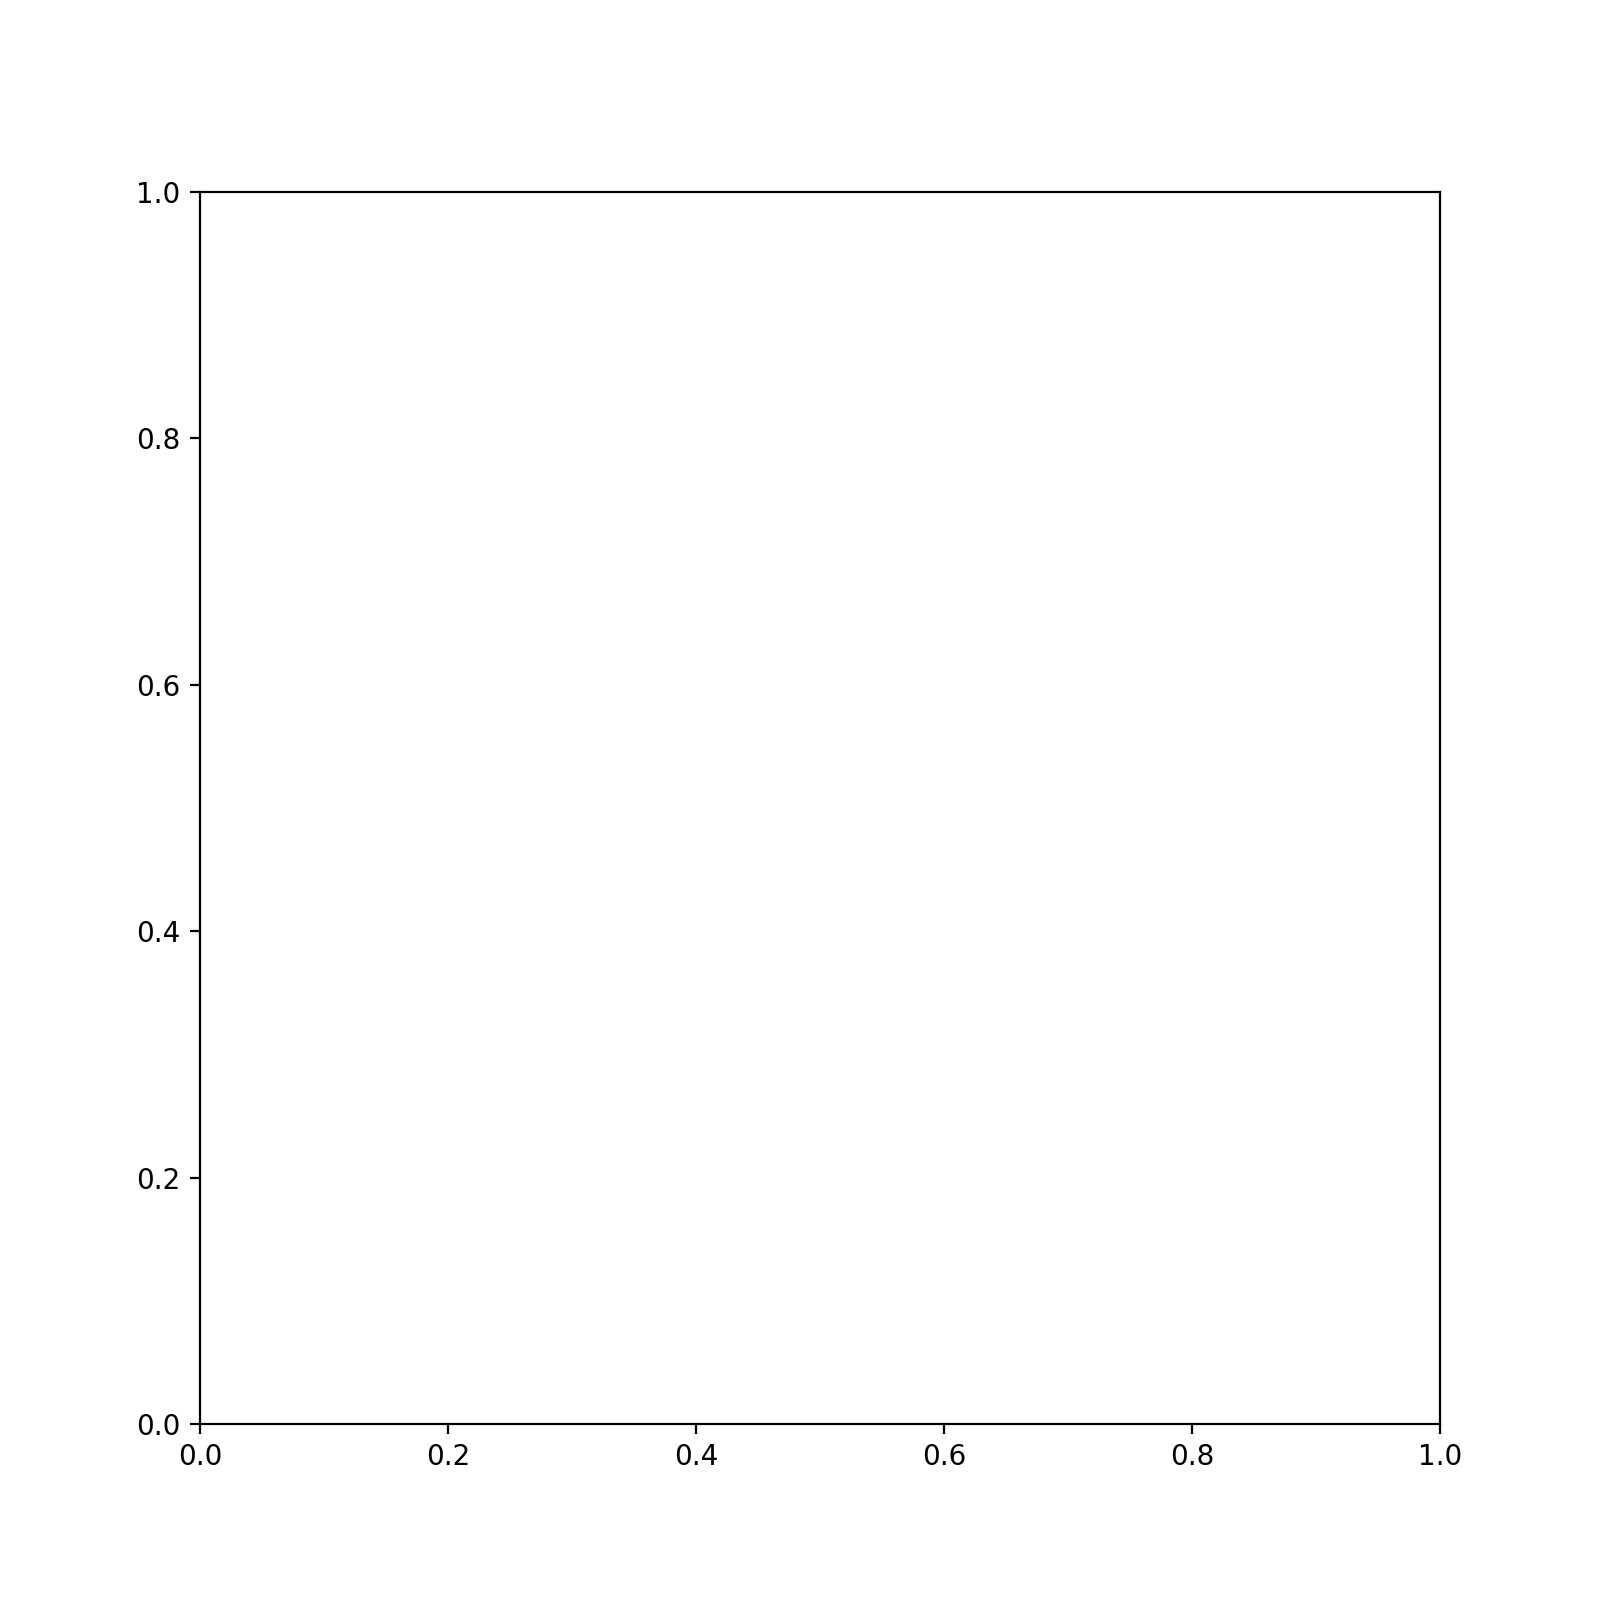

In [ ]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize =(8,8))

wordcloud = WordCloud(
                      background_color='white',
                      width=512,
                      height=384
                      ).genrate(' '.join(x2011))

plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [ ]:
x2015 = timesData.country[timesData.year == 2015]

trace0 = go.Box(
    x = x2015.total_score,
    name = 'Wyniki uniwersytetów w 2015',
    marker = dict(color = 'rgba(12, 12, 140)',)
    )

trace1 = go.Box(
    x = x2015.research,
    name = 'Badania uniwersytetów w 2015',
    marker = dict(color = 'rgba(12, 128, 128)',)
    )

data = ['trace0', 'trace1']
iplot(data)

AttributeError: ignored

In [ ]:
import numpy as np
import plotly.figure_factory as ff

In [ ]:
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,['research', 'international', 'total_score']]
data2015['index'] = np.arange(1, len(data2015)+1)

fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index', colormap='Portland', colormap_type='cat', height=700, width=700)

iplot(fig)

In [ ]:
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255, 0, 0)')
    )

data=[trace1]
layout=go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig=go.Figure(data=data, layout=layout)
iplot(fig)

#Zadanie 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
ves_usd = pd.read_csv('ves-usd.csv', thousands = ',', parse_dates = True, index_col = 'Date')

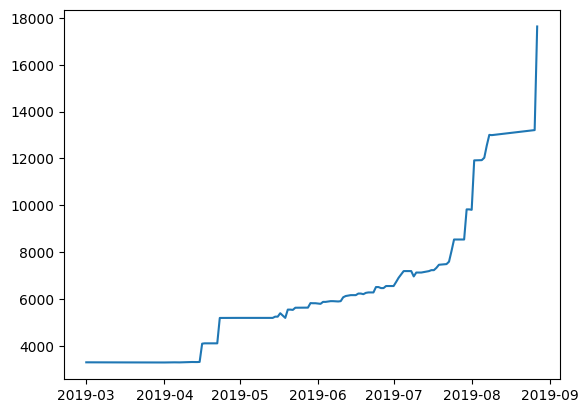

In [ ]:
fig, ax = plt.subplots()
ax.plot(ves_usd.index, ves_usd['Rate'])

plt.show()

#Zadanie 2

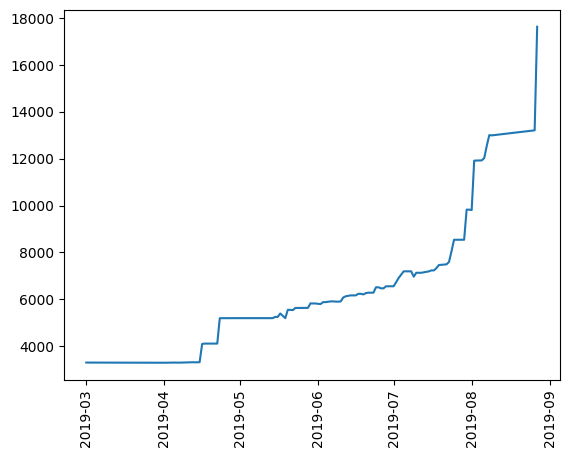

In [ ]:
fig, ax = plt.subplots()
ax.plot(ves_usd.index, ves_usd['Rate'])
ax.set_xlabel = ('Daty')
ax.set_ylabel = ('Współczynnik podziału boliwiara do dolara amerykańskiego')
ax.set_title = ('Zależność boliwiara od dolara amerykańskiego.')
ax.xaxis.set_tick_params(rotation = 90)

plt.show()

#Zadanie 3

In [ ]:
import itertools

In [ ]:
medals = pd.read_csv('olympic.csv', index_col = ['Year', 'ID'])

In [ ]:
def analyze_medals(medal_df):
  countries = groupby_column(medal_df, 'NOC')
  ret = {}
  for country, df in countries.items():
    count = df['Medal'].value_counts()
    gold = counts['Gold'] if 'Gold' in counts else 0
    silver = counts['Silver'] if 'Silver' in counts else 0
    bronze = counts['Bronze'] if 'Bronze' in counts else 0
    ret[country] = (gold, silver, bronze)
  return ret

analyze_medals(medals)

NameError: ignored

In [ ]:
c_df = pd.DataFrame.from_dict(analyze_medals(medals),
                             orient = 'index',
                              columns = ['Gold', 'Silver', 'Bronze'])

new_medals = c_df[c_df.sum(axis=1)>500]
new_medals

NameError: ignored

In [ ]:
fig, ax = plt.subplots()
ax.bar = (new_medals.index, new_medals['Gold'], label = 'Gold')
ax.bar = (new_medals.index, new_medals['Silver'], bottom = new_medals['Gold'], label = 'Silver')
ax.bar = (new_medals.index, new_medals['Bronze'], bottom = new_medals['Gold'] + ['Silver'], label = 'Bronze')

ax.tick_params('x', labelrotation = 90)
ax.set_ylabel = ('Ilość medali')

ax.legend()
plt.show()

SyntaxError: ignored

#Zadanie 4

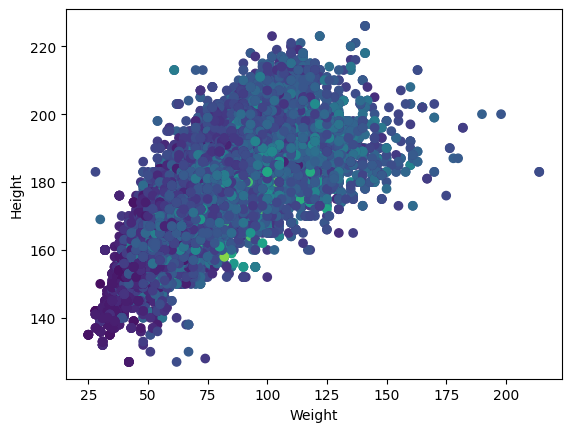

In [ ]:
fig, ax = plt.subplots()
ax.scatter(medals['Weight'], medals['Height'], c=medals['Age'])
ax.set_xlabel('Weight')
ax.set_ylabel('Height')

plt.show()

#Zadanie 5

In [ ]:
co2 = pd.read_csv('co2(1).csv', na_values=-99.99, parse_dates = True, index_col = 'Date')

In [ ]:
import seaborn as sns

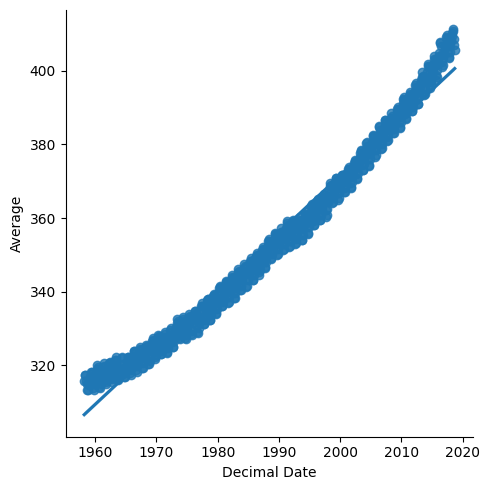

In [ ]:
sns.lmplot(x = 'Decimal Date', y='Average', data = co2)

#Zadanie 6

In [ ]:
def groupby_column(dataframe, column):
  groupby = dataframe.groupby(column)
  return {x: groupby.get_group(x) for x in groupby.groups}

  all_sports = groupby_column(medals, 'Sport')

In [ ]:
sns.boxplot(data = all_sports['Gymnastics'])

NameError: ignored